In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set(font="AppleGothic", rc={"axes.unicode_minus":False})

In [2]:
df = pd.read_csv("data/weather_2010_2019.csv")
df.shape

(3652, 61)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   지점                   3652 non-null   int64  
 1   일시                   3652 non-null   object 
 2   평균기온(°C)             3652 non-null   float64
 3   최저기온(°C)             3652 non-null   float64
 4   최저기온 시각(hhmi)        3652 non-null   int64  
 5   최고기온(°C)             3651 non-null   float64
 6   최고기온 시각(hhmi)        3651 non-null   float64
 7   강수 계속시간(hr)          1424 non-null   float64
 8   10분 최다 강수량(mm)       890 non-null    float64
 9   10분 최다강수량 시각(hhmi)   649 non-null    float64
 10  1시간 최다강수량(mm)        890 non-null    float64
 11  1시간 최다 강수량 시각(hhmi)  652 non-null    float64
 12  일강수량(mm)             1424 non-null   float64
 13  최대 순간 풍속(m/s)        3650 non-null   float64
 14  최대 순간 풍속 풍향(16방위)    3650 non-null   float64
 15  최대 순간풍속 시각(hhmi)     3650 non-null   f

In [4]:
df["일시"] = pd.to_datetime(df["일시"])

In [5]:
df["연"] = df["일시"].dt.year
df["월"] = df["일시"].dt.month
df["일"] = df["일시"].dt.day
df["요일"] = df["일시"].dt.dayofweek

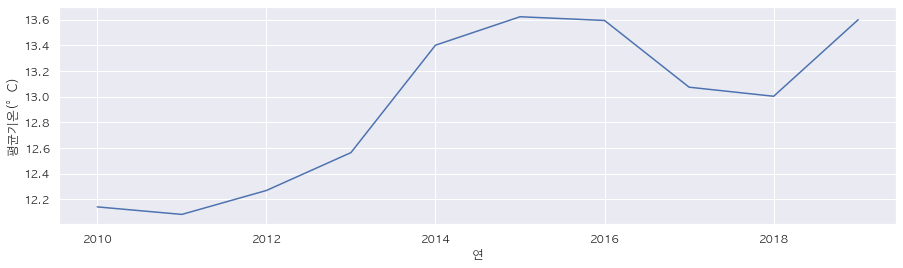

In [6]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x="연", y="평균기온(°C)", ci=None)

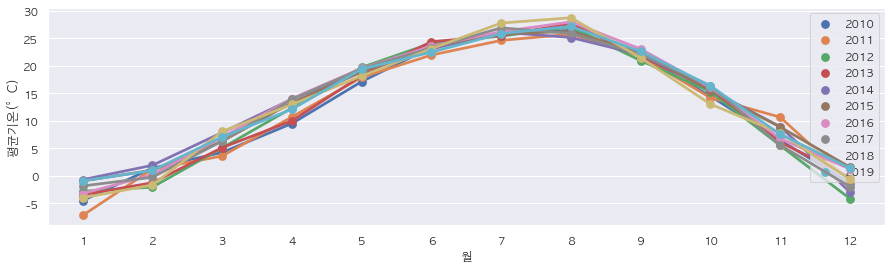

In [7]:
plt.figure(figsize=(15, 4))
sns.pointplot(data=df, x="월", y="평균기온(°C)", ci=None, hue="연")
plt.legend(loc=1)

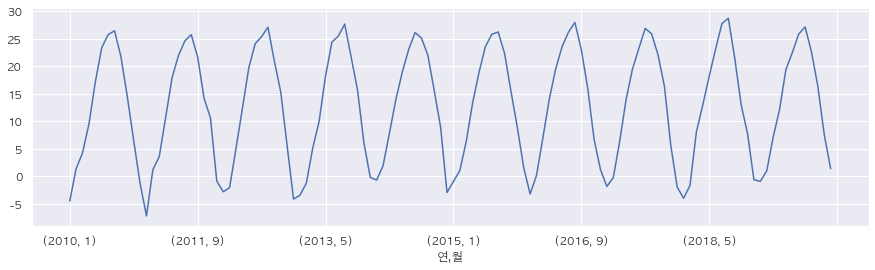

In [8]:
df.groupby(["연", "월"])["평균기온(°C)"].mean().plot(figsize=(15, 4))

In [9]:
year_month_temp = df.groupby(["연", "월"])["평균기온(°C)"].mean().unstack().round(1)
year_month_temp

월,1,2,3,4,5,6,7,8,9,10,11,12
연,,,,,,,,,,,,
2010,-4.5,1.4,4.3,9.5,17.2,23.4,25.8,26.5,21.8,14.5,6.5,-1.3
2011,-7.2,1.2,3.6,10.7,17.9,22.0,24.6,25.8,21.8,14.2,10.7,-0.9
2012,-2.8,-2.0,5.1,12.3,19.7,24.1,25.4,27.1,21.0,15.3,5.5,-4.1
2013,-3.4,-1.2,5.1,10.0,18.2,24.4,25.5,27.7,21.8,15.8,6.1,-0.2
2014,-0.7,1.9,7.9,14.0,18.9,23.1,26.1,25.2,22.1,15.6,9.0,-2.9
2015,-0.9,1.0,6.3,13.3,18.9,23.6,25.8,26.3,22.4,15.5,8.9,1.6
2016,-3.2,0.2,7.0,14.1,19.6,23.6,26.2,28.0,23.1,16.1,6.8,1.2
2017,-1.8,-0.2,6.3,13.9,19.5,23.3,26.9,25.9,22.1,16.4,5.6,-1.9
2018,-4.0,-1.6,8.1,13.0,18.2,23.1,27.8,28.8,21.5,13.1,7.8,-0.6


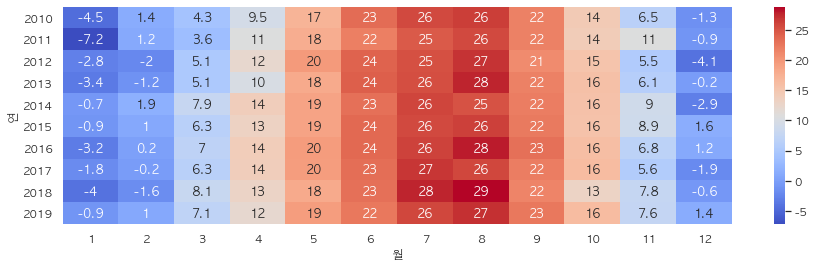

In [10]:
plt.figure(figsize=(15, 4))
sns.heatmap(year_month_temp, annot=True, cmap="coolwarm")

In [11]:
year_month_temp_median = df.groupby(["연", "월"])["평균기온(°C)"].median().unstack().round(1)
year_month_temp_median

월,1,2,3,4,5,6,7,8,9,10,11,12
연,,,,,,,,,,,,
2010,-5.0,0.6,4.5,9.2,17.3,23.2,26.0,26.5,23.2,15.8,6.4,-1.2
2011,-7.0,1.2,2.9,10.6,17.3,21.7,24.7,25.4,21.6,14.8,12.2,-1.7
2012,-2.8,-1.3,5.0,12.0,19.8,23.7,25.8,27.2,21.0,15.7,5.2,-4.5
2013,-3.5,-1.2,5.1,9.6,18.9,24.6,25.3,28.2,22.2,16.2,5.4,-0.5
2014,-0.1,2.3,6.8,14.6,19.6,23.4,26.4,24.9,22.0,16.0,9.4,-3.2
2015,-0.9,1.2,5.6,13.5,18.7,24.1,25.6,26.6,22.2,16.9,10.4,1.5
2016,-3.3,0.0,7.9,14.1,19.4,23.8,27.3,29.3,23.4,16.8,6.0,1.6
2017,-2.2,-0.2,7.1,14.2,20.0,23.6,26.8,26.3,22.4,16.6,4.8,-2.1
2018,-3.0,-0.8,7.6,13.7,18.1,22.9,28.2,29.9,22.0,13.2,8.1,0.0


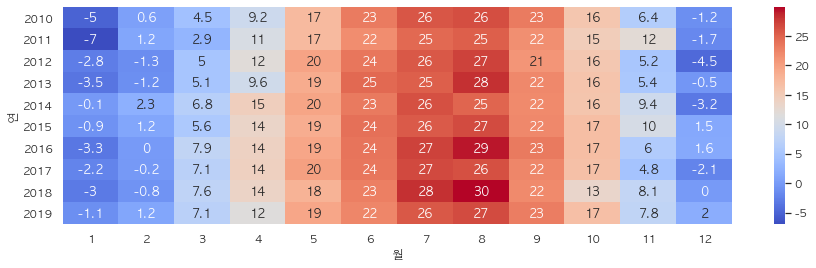

In [12]:
plt.figure(figsize=(15, 4))
sns.heatmap(year_month_temp_median, annot=True, cmap="coolwarm")

In [13]:
corr = df.corr()
corr = corr.dropna(how="all")
corr = corr.dropna(how="all", axis=1)
corr

,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),1시간 최다강수량(mm),1시간 최다 강수량 시각(hhmi),...,합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),안개 계속시간(hr),합계 일조시간(hr),합계 일사량(MJ/m2),연,월,일,요일
평균기온(°C),1.000000,0.990178,-0.152257,0.989979,0.107666,0.082180,0.187891,0.100317,0.146876,0.057337,...,0.438085,0.558975,0.238034,-0.011600,0.042145,0.400934,0.042924,0.247683,0.005477,0.006067
최저기온(°C),0.990178,1.000000,-0.116882,0.964962,0.075573,0.133492,0.216646,0.067116,0.178350,0.034790,...,0.343486,0.492128,0.256610,0.020918,-0.047813,0.312454,0.021563,0.253389,0.005445,0.006751
최저기온 시각(hhmi),-0.152257,-0.116882,1.000000,-0.185097,-0.437688,0.151611,0.074082,0.173431,0.075348,0.156508,...,-0.247984,-0.225353,0.141029,-0.119412,-0.196944,-0.271558,-0.010639,0.021434,0.010216,-0.026913
최고기온(°C),0.989979,0.964962,-0.185097,1.000000,0.134869,0.019058,0.133444,0.136936,0.084909,0.093330,...,0.523802,0.618058,0.208403,-0.040765,0.149718,0.493351,0.067426,0.232294,0.003188,0.008300
최고기온 시각(hhmi),0.107666,0.075573,-0.437688,0.134869,1.000000,-0.327913,-0.114513,-0.022222,-0.138033,-0.044837,...,0.287937,0.244037,-0.158943,0.104019,0.258949,0.263308,0.034496,-0.016666,-0.009413,0.023095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
합계 일사량(MJ/m2),0.400934,0.312454,-0.271558,0.493351,0.263308,-0.541419,-0.226686,-0.027739,-0.274018,-0.022350,...,0.939964,0.940459,-0.200220,0.752978,0.851800,1.000000,NaN,-0.157689,-0.075321,-0.011554
연,0.042924,0.021563,-0.010639,0.067426,0.034496,-0.005151,-0.092777,-0.011864,-0.092324,-0.061868,...,0.013288,0.154501,-0.078573,-0.227981,NaN,NaN,1.000000,0.000125,-0.000144,-0.000739
월,0.247683,0.253389,0.021434,0.232294,-0.016666,-0.030778,0.112054,0.035490,0.093577,0.007915,...,-0.131348,-0.027749,0.033914,0.129906,-0.089738,-0.157689,0.000125,1.000000,0.010796,0.000257
일,0.005477,0.005445,0.010216,0.003188,-0.009413,-0.018712,-0.023944,-0.004699,-0.000198,-0.021024,...,-0.047508,-0.018483,0.005011,-0.043878,-0.069993,-0.075321,-0.000144,0.010796,1.000000,-0.000260


[Plotting a diagonal correlation matrix — seaborn 0.10.1 documentation](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

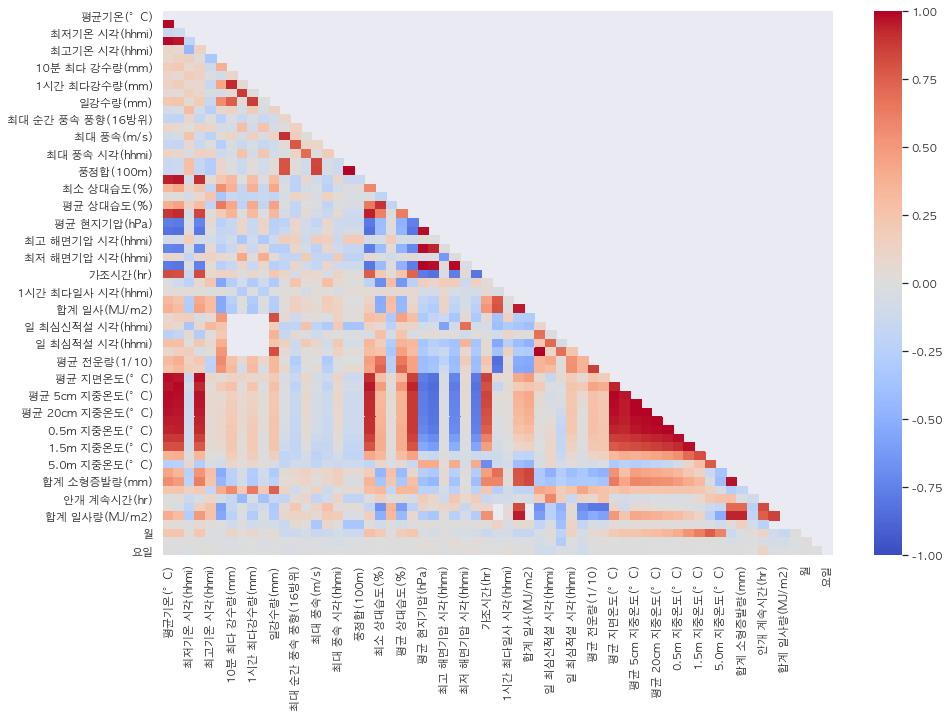

In [14]:
plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, cmap="coolwarm", vmax=1, vmin=-1, mask=mask)